# Car Price Prediction

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


# 1. Data understanding and exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)
pd.set_option("display.float", "{:.2f}".format)

In [2]:
data = pd.read_csv('data/CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [4]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,59.32,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,1.00,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,103.00,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,205.00,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


In [6]:
for column in data.columns:
    print(f"{column}: {data[column].nunique()}")
    if data[column].nunique() < 10:
        print(f"{data[column].value_counts()}")
    print("====================================")

car_ID: 205
symboling: 6
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
CarName: 147
fueltype: 2
gas       185
diesel     20
Name: fueltype, dtype: int64
aspiration: 2
std      168
turbo     37
Name: aspiration, dtype: int64
doornumber: 2
four    115
two      90
Name: doornumber, dtype: int64
carbody: 5
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
drivewheel: 3
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
enginelocation: 2
front    202
rear       3
Name: enginelocation, dtype: int64
wheelbase: 53
carlength: 75
carwidth: 44
carheight: 49
curbweight: 171
enginetype: 7
ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
cylindernumber: 7
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64
enginesize: 44
fuelsystem

## `car_ID`

In [7]:
data.car_ID.nunique()

205

In [8]:
data.set_index('car_ID', inplace=True)
data.index.name = None
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00


## `price`

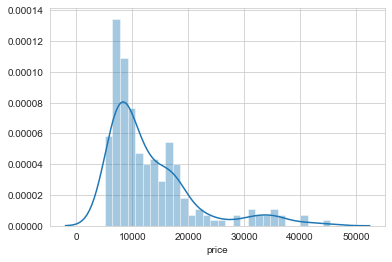

In [9]:
sns.distplot(data.price, bins=30)

## Discrete Features

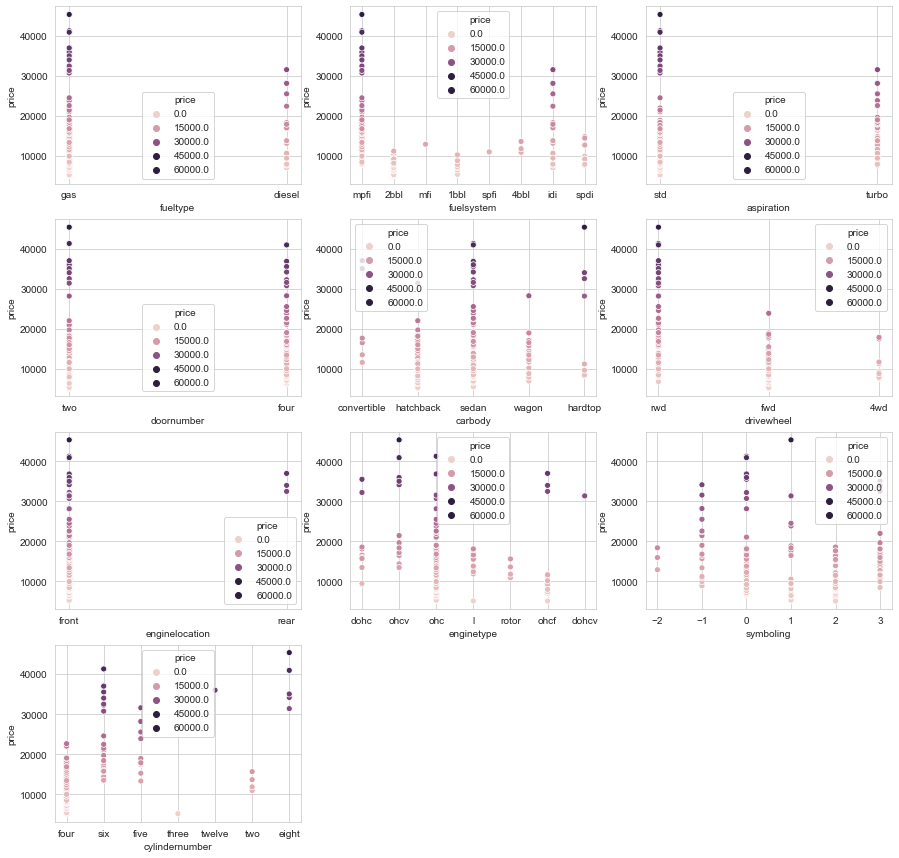

In [10]:
discrete_col = ['fueltype', 'fuelsystem', 'aspiration', 'doornumber', 'carbody', 
                'drivewheel', 'enginelocation', 'enginetype', 'symboling', 
                'cylindernumber']
plt.figure(figsize=(15, 15))
for i, column in enumerate(discrete_col, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(column, 'price', data=data, hue='price')

## Continuous Features

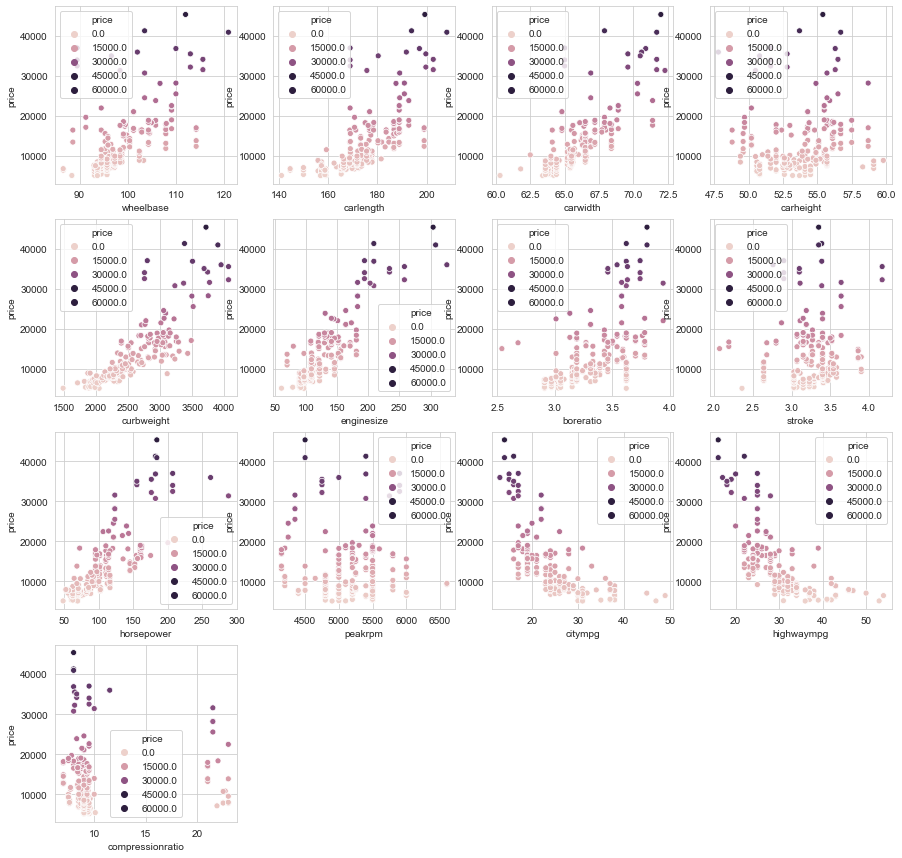

In [13]:
continous_col = ['wheelbase', 'carlength', 'carwidth', 'carheight', 
                 'curbweight', 'enginesize', 'boreratio', 'stroke', 
                 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 
                 'compressionratio']
plt.figure(figsize=(15, 15))
for i, column in enumerate(continous_col, 1):
    plt.subplot(4, 4, i)
    sns.scatterplot(column, 'price', data=data, hue='price')

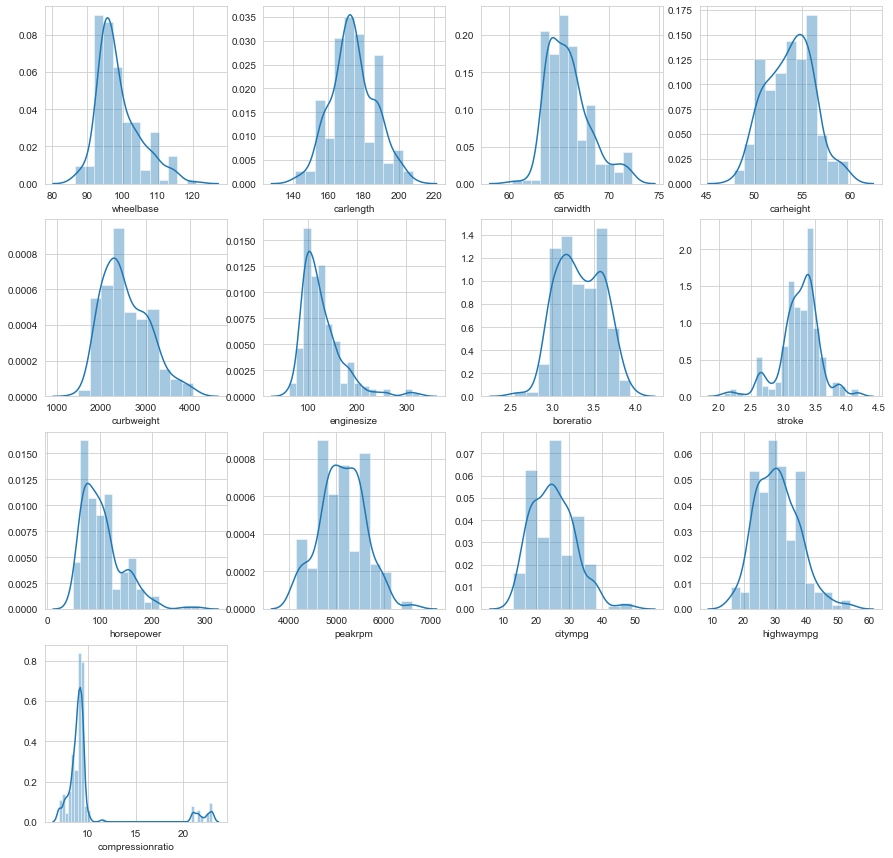

In [14]:
continous_col = ['wheelbase', 'carlength', 'carwidth', 'carheight', 
                 'curbweight', 'enginesize', 'boreratio', 'stroke', 
                 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 
                 'compressionratio']
plt.figure(figsize=(15, 15))
for i, column in enumerate(continous_col, 1):
    plt.subplot(4, 4, i)
    sns.distplot(data[column])

## Correlation Analysis

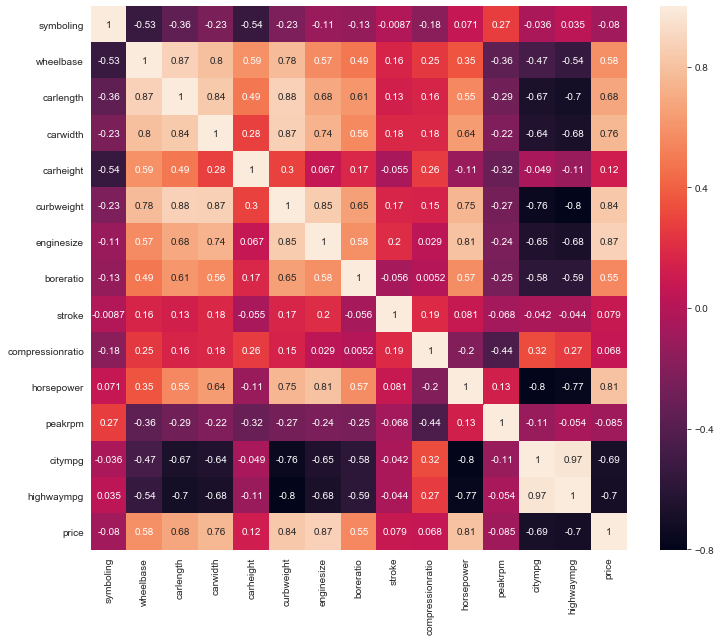

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True)

The heatmap shows some useful insights:

Correlation of price with independent variables:
- Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower (notice how all of these variables represent the size/weight/engine power of the car)

- Price is negatively correlated to ```citympg``` and ```highwaympg``` (-0.70 approximately). This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower (think Maruti Alto/Swift type of cars, which are designed to be affordable by the middle class, who value mileage more than horsepower/size of car etc.)

Correlation among independent variables:
- Many independent variables are highly correlated (look at the top-left part of matrix): wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight', and are positively correlated 


Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

# 2. Data Cleaning

## `CarName`

In [16]:
data.CarName.nunique()

147

In [17]:
data['brand'] = data.CarName.str.split(' ', expand=True)[0].str.lower()

data['brand'] = data.brand.str.replace('toyouta', 'toyota')
data['brand'] = data.brand.str.replace('porcshce', 'porsche')
data['brand'] = data.brand.str.replace('maxda', 'mazda')
data['brand'] = data.brand.str.replace('vw', 'volkswagen').str.replace('vokswagen', 'volkswagen')
data['brand'] = data.brand.str.replace('vw', 'volkswagen').str.replace('vokswagen', 'volkswagen')

data.brand.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
renault         2
mercury         1
Name: brand, dtype: int64

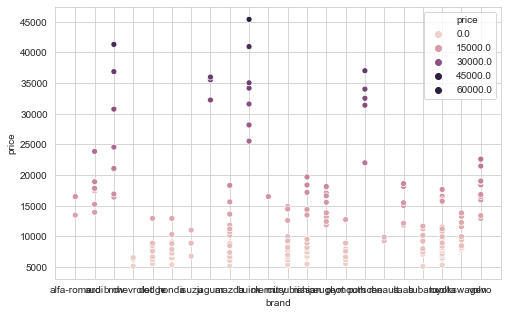

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot('brand', 'price', data=data, hue='price')

In [19]:
data.brand.nunique()

22

In [20]:
data.drop('CarName', axis=1, inplace=True)

# 3. Data Pre-processing

In [25]:
object_features = data.select_dtypes(include=('object')).columns.tolist()
object_features

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'brand']

In [27]:
data_1 = pd.get_dummies(data, columns=object_features, drop_first=True, dtype='uint8')

In [28]:
data_1.dtypes

symboling                  int64
wheelbase                float64
carlength                float64
carwidth                 float64
carheight                float64
curbweight                 int64
enginesize                 int64
boreratio                float64
stroke                   float64
compressionratio         float64
horsepower                 int64
peakrpm                    int64
citympg                    int64
highwaympg                 int64
price                    float64
fueltype_gas               uint8
aspiration_turbo           uint8
doornumber_two             uint8
carbody_hardtop            uint8
carbody_hatchback          uint8
carbody_sedan              uint8
carbody_wagon              uint8
drivewheel_fwd             uint8
drivewheel_rwd             uint8
enginelocation_rear        uint8
enginetype_dohcv           uint8
enginetype_l               uint8
enginetype_ohc             uint8
enginetype_ohcf            uint8
enginetype_ohcv            uint8
enginetype

In [29]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 65 columns):
symboling                205 non-null int64
wheelbase                205 non-null float64
carlength                205 non-null float64
carwidth                 205 non-null float64
carheight                205 non-null float64
curbweight               205 non-null int64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
citympg                  205 non-null int64
highwaympg               205 non-null int64
price                    205 non-null float64
fueltype_gas             205 non-null uint8
aspiration_turbo         205 non-null uint8
doornumber_two           205 non-null uint8
carbody_hardtop          205 non-null uint8
carbody_hatchback        205 non-null uint8

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data_1.drop('price', axis=1)
y = data_1.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [40]:
from sklearn import metrics

def print_evaluate(true, predicted, train=True):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    if train:
        print("========Training Result=======")
        print(f'MAE:\t\t {mae:.4f}')
        print(f'MSE:\t\t {mse:.4f}')
        print(f'RMSE:\t\t {rmse:.4f}')
        print(f'R2 Square:\t {r2_square:.4f}')
    elif not train:
        print("=========Testing Result=======")
        print(f'MAE:\t\t {mae:.4f}')
        print(f'MSE:\t\t {mse:.4f}')
        print(f'RMSE:\t\t {rmse:.4f}')
        print(f'R2 Square:\t {r2_square:.4f}')

# 4. Model Building

## 4. 1. Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

print_evaluate(y_train, y_train_pred, train=True)
print_evaluate(y_test, y_test_pred, train=False)

========Training Result=======
MAE:		 898.5240
MSE:		 1327180.6315
RMSE:		 1152.0333
R2 Square:	 0.9782
=========Testing Result=======
MAE:		 2072.7333
MSE:		 7942216.1984
RMSE:		 2818.1938
R2 Square:	 0.8854


### Feature selection using RFE

In [42]:
from sklearn.feature_selection import RFE

rfe_30 = RFE(lr_model, 30)
rfe_30.fit(X_train, y_train)

print(rfe_30.support_)
print(rfe_30.ranking_)

[False  True False  True False  True  True  True False False False  True
 False False False  True False False  True  True  True False False  True
 False  True False False  True  True False False False False False  True
  True False False False  True False False False  True  True False  True
  True False False  True False  True  True  True  True  True  True False
 False  True  True False]
[13  1  2  1  6  1  1  1 24 10 16  1 18 26 11  1 27 33  1  1  1 17  4  1
 15  1 22 31  1  1  3 21  8 35  9  1  1 30 12 34  1 29 28 32  1  1  7  1
  1 14 23  1 20  1  1  1  1  1  1 25  5  1  1 19]


In [43]:
y_train_pred = rfe_30.predict(X_train)
y_test_pred = rfe_30.predict(X_test)

print_evaluate(y_train, y_train_pred, train=True)
print_evaluate(y_test, y_test_pred, train=False)

========Training Result=======
MAE:		 1015.0173
MSE:		 1692389.9979
RMSE:		 1300.9189
R2 Square:	 0.9722
=========Testing Result=======
MAE:		 1970.5456
MSE:		 7356797.9740
RMSE:		 2712.3418
R2 Square:	 0.8938


# 4. 2. Artificial Neural Networks

In [51]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [57]:
model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer=Adam(0.01), loss='mse')

In [58]:
r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=512,
              epochs=200)

Train on 143 samples, validate on 62 samples
Epoch 1/1000
143/143 [==============================] - 2s 12ms/sample - loss: 240735920.0000 - val_loss: 237535392.0000
Epoch 2/1000
143/143 [==============================] - 0s 190us/sample - loss: 240691072.0000 - val_loss: 237453152.0000
Epoch 3/1000
143/143 [==============================] - 0s 551us/sample - loss: 240604144.0000 - val_loss: 237284848.0000
Epoch 4/1000
143/143 [==============================] - 0s 433us/sample - loss: 240416816.0000 - val_loss: 236963552.0000
Epoch 5/1000
143/143 [==============================] - 0s 198us/sample - loss: 240061680.0000 - val_loss: 236376816.0000
Epoch 6/1000
143/143 [==============================] - 0s 220us/sample - loss: 239441216.0000 - val_loss: 235358512.0000
Epoch 7/1000
143/143 [==============================] - 0s 282us/sample - loss: 238382480.0000 - val_loss: 233673536.0000
Epoch 8/1000
143/143 [==============================] - 0s 211us/sample - loss: 236654624.0000 - val_l

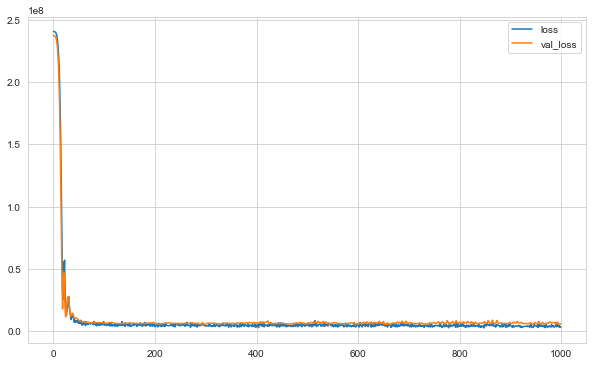

In [59]:
plt.figure(figsize=(10, 6))

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [60]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_evaluate(y_train, y_train_pred, train=True)
print_evaluate(y_test, y_test_pred, train=False)

========Training Result=======
MAE:		 998.0313
MSE:		 1625326.5694
RMSE:		 1274.8830
R2 Square:	 0.9733
=========Testing Result=======
MAE:		 1747.8636
MSE:		 5829620.7373
RMSE:		 2414.4608
R2 Square:	 0.9159
